# Symbolic computations
First, as in every new kernel, you should start with setting up the environment, as explained in the previous part.

In [1]:
from sympy import *
from IPython.core.interactiveshell import InteractiveShell #print all elements, not only last one
InteractiveShell.ast_node_interactivity = "all"
init_printing(use_unicode=True)

In [4]:
from IPython.core.interactiveshell import InteractiveShell #print all elements, not only last one
InteractiveShell.ast_node_interactivity = "all"
init_printing(use_unicode=True)

NameError: name 'init_printing' is not defined

## Assigning symbols to variables
In order to use symbols in computations it is necessary to define them first. If you don't do it, python understands them as variables.

In [2]:
x+1 # before assignment

NameError: name 'x' is not defined

In [3]:
x = symbols("x") #assigning symbol to variable
x+1 #after assignment

NameError: name 'symbols' is not defined

In [4]:
del x # in order to prevent mistakes, it is best to assign new symbols to variables before each example

It is also possible to define functions as symbols. Operations that can be performed on these functions will be shown later. In this part we will be only taking care of single symbols. Below are two equal ways to define a function - using _symbols_ method with _cls=function_ and _Function_ method.

In [5]:
f = symbols('f', cls=Function)
g = Function('f')

In [6]:
type(f)==type(g)
f==g
f is g

True

True

True

In [7]:
del f, g

## Symbols assumptions
There are many assumptions that can be given to symbols, below we presented only some of them with the differences that they cause. 

In [8]:
#symbol a is a real number, symbol b doesn't have to be real
a = symbols("a", real=True)
b = symbols("b", real=False)

#sqrt(-1) is an imaginary number i. Assuming that a is real, first equation has no solution.
# Without such an assuption, b can be equal to i, since it doesn't have to be real.
solve(Eq(a,sqrt(-1)))
solve(Eq(b,sqrt(-1)))

In [10]:
# symbol a is even, symbol b is odd
a = symbols("a", even=True)
b = symbols("b", even=False)

# when 4*a=8, there is a solution - a is even.
# when 4*b=8, there is no solution, since here are no odd numbers that solve this equation.
solve(Eq(4*a,8))
solve(Eq(4*b,8))

In [13]:
# symbol a has to be prime, symbol b can't be prime
a = symbols("a", prime=True)
b = symbols("b", prime=False)

# there is no solution where a is prime
solve(Eq(a,6))
solve(Eq(b,6))

# there is no solution where b is not prime
solve(Eq(a,7))
solve(Eq(b,7))

In [10]:
#a is an integer, b is not an integer
a = symbols("a", integer=True)
b = symbols("b", integer=False)

# setting an equal sign between a and 6.0 (float)
# although mathematically it is the same, python treats 6 and 6.0 differently 
solve(Eq(a,6.0))
solve(Eq(b,6.0))

In [11]:
# it is also possible to quickly create sequences of variables - very useful in economics!
x = symbols("x:10",seq=True)
x

In [12]:
del a,b,x

> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"></left> Ex.1
> #### Define expression _x+1_. Change the value of x to 2 and solve expression.

Once defined, a symbol cannot change to a variable (a value cannot be assigned to a symbol) with the "=" sign.

In [13]:
x = symbols('x')    # assigning symbol x to variable x
expr = x + 1        # defining symbolic expression
x = 2               # assignment of number to symbol AFTER defining expression
expr                # after printing, expression is still written with a symbol, 2 didn't replace x

However it can be assigned using the subs function.

In [19]:
x = symbols('x')
expr = x + 1
expr.subs(x, 2)
# the result of x+1 where x=2 is 3

#### <left><img src='https://image.flaticon.com/icons/svg/179/179386.svg' width="25px"></left> What happens in first cell above?

```python
x = symbols('x')
expr = x + 1
x = 2
expr
```

Line 1 assigns symbol 'x' to variable x, and later line 3 assigns number 2 to variable x. After line 1, when printing x, we can see symbol x. When defining expr in line 2, x stands for symbol. It doesn't overwrite x to 2 in expr when defining x=2. Expression has already been defined before.

In [16]:
x = symbols('x')
x

In [17]:
expr = x + 1
expr, x

In [18]:
x = 2
expr, x

In [15]:
del x

> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"></left> Ex.2
> #### a) Assign symbols _a,b,c_ to variables _a,b,c_ and print them.
> #### b) Assign a symbol to a variable written differently. Then assign symbol _coefficient_ to a variable that is much shorter to write.

In [16]:
a, b, c = symbols("a, b, c")
a
b
c

In [17]:
written, cf = symbols("printed, coefficient")
written
cf

In [18]:
del a, b, c, written, cf

#### <left><img src='https://image.flaticon.com/icons/svg/179/179386.svg' width="25px"></left> ^ is XOR and \** is power
There is an important difference between python and some other languages when it comes to the ^ sign. In python it is the _xor_ logical operator however in some languages the ^ sign indicates the power of a number. See the difference in examples below.  

In [22]:
# ^ as logical operator XOR
1^1  
1^0  
0^0  
0^1

In [29]:
2^2  # ^ treats 2 as True - so True XOR True is 0 (False)
2**2 # 2 squared is 4

## Solving equations and inequations
> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"> Ex.3
> #### Write and print equations below. Then solve for x=2 and e=np.e (from numpy library)
> #### a) $x=y$
> #### b) $x-y=4$
> #### c) $y=\frac{2}{2x^2+x+5}$
> #### d) $e^y=\frac{1}{x^2}$
> #### e) $y+2-x\leq 0$
> #### f) $x\sqrt{3}+4\geq2x-y^2+\sqrt{12}$
> _source pts. e & f: _ https://www.matemaks.pl/matura-podstawowa-z-matematyki-kurs-nierownosci.html

In [20]:
x, y, e = symbols("x, y, e")

#define equations
# a)
eq_a = Eq(x,y)
# b)
eq_b = Eq(x-y,4)
# c)
eq_c = Eq(y, 2/(x+2*x**2+5))
# d)
eq_d = Eq(e**y,1/x**2)
# e)
eq_e = y+2-x <=0
# f)
eq_f = (x*sqrt(3)+4>=2*x + y**2)
# g)
eq_g = Abs(x-y)>0

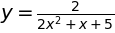

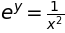

In [21]:
#print equations
eq_a
eq_b
eq_c
eq_d
eq_e
eq_f
eq_g

In [22]:
# Define values of x and e
# a)
eq_a = eq_a.subs(x,2)
# b)
eq_b = eq_b.subs(x,2)
# c)
eq_c = eq_c.subs(x,2)
# d)
import numpy as np
eq_d = eq_d.subs({x:2,e:np.e})
# e)
eq_e = eq_e.subs(x, 2)
# f)
eq_f = eq_f.subs(x, 2)
# g)
eq_g = eq_g.subs(x, 2)

In [23]:
#print equations after defining
eq_a
eq_b
eq_c
eq_d
eq_e
eq_f
eq_g

In [24]:
#solve equations
# a)
solve(eq_a, y)
# b)
solve(eq_b, y)
# c)
solve(eq_c, y)
# d)
solve(eq_d, y)
# e)
reduce_inequalities(eq_e)
# f)
reduce_inequalities(eq_f)
# g)
reduce_inequalities(eq_g)

In [25]:
del x,y,e

other inequality solvers can be found here: https://docs.sympy.org/latest/modules/solvers/inequalities.html 

<left><img src='https://image.flaticon.com/icons/svg/179/179386.svg' width="25px"></left>
#### You can first solve the equation and later define values of symbols, but the syntax is a bit different:

First defined value:

In [26]:
x, y = symbols("x, y")
eq = Eq(x+1,y)
eq
solve(eq.subs(x,3),y)
solve(eq.subs(x,3),y)[0] # solve outputs a list, here with only one element. The 0 in brackets - [0] - refers to element 0 of that list

First solved equation:

In [27]:
eq = Eq(x+1,y)
eq
solve(eq,y) # this outputs a list
solve(eq,y)[0] # this outputs first element of list, required for next step - subs() not working on lists
solve(eq,y)[0].subs(x,3) # this assigns 3 to x

<left><img src='https://image.flaticon.com/icons/svg/179/179386.svg' width="25px"></left>
#### Equations can be also converted from strings using <code>sympify()</code>.

In [28]:
str_expr = "x**2 + 3*x - 1/2"
expr = sympify(str_expr)
expr

## Equation simplification

> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"> Ex.4
> #### Simplify these equations using functions <code>simplify(), expand(), factor(), collect(), cancel() </code>. What are the differences between these functions?
> #### a) $(x-y)(\frac{1}{x}-\frac{1}{y})$
> #### b) $\frac{3x^2-3y^2}{12x-12y}$
> #### c) $\frac{x^3+3x^2y+3xy^2+y^3}{x^2+2xy+y^2}$
> #### d) $(x-\sqrt[3]{5})(x^2+\sqrt[3]{5}x+\sqrt[3]{25})$
> #### e) $xz+ x^2a - x +x^2z^2+3$
_source for pts. a & b: http://www.math-exercises.com/algebraic-expressions-and-polynomials/algebraic-fractions_

In [29]:
a, z, x, y = symbols("a, z, x, y")

In [30]:
#a)
eq = (x-y)*(1/x-1/y)
eq
simplify(eq)
expand(eq)
factor(eq)
collect(eq,x)
cancel(eq)

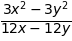

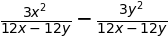

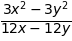

In [31]:
#b)
eq = (3*x**2-3*y**2)/(12*x-12*y)
eq
simplify(eq)
expand(eq)
factor(eq)
collect(eq,x)
cancel(eq)

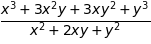

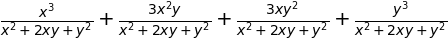

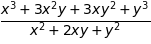

In [32]:
#c)
eq = (x**3+3*x**2*y+3*x*y**2+y**3)/(x**2+2*x*y+y**2)
eq
simplify(eq)
expand(eq)
factor(eq)
collect(eq,x)
cancel(eq)

In [33]:
#d)
eq = (x-root(5,3))*(x**2+root(5,3)*x+root(25,3))
eq
simplify(eq)
expand(eq)
factor(eq)
collect(eq,x)
cancel(eq)

In [34]:
#e)
eq = x*z+ x**2*a - x +x**2*z**2+3
eq
simplify(eq)
expand(eq)
factor(eq)
collect(eq,x)
cancel(eq)

_simplify()_ is a function that is the most general among those mentioned above. It attempts to choose the most simplified form of all - as you can see above it chooses one of the others as an output.

_expand()_ is a function used to get rid of parentheses. Sometimes it makes the function more complicated, like in example c) or much simpler in d).

_factor()_ is best to use for polinomials (wielomiany) and it converts them into factors (czynniki). When used on polinomials, it is actually the opposite of the _expand()_ function. In order to get a list of factors with their powers, you can use function <i>factor\_list()</i>.

_collect()_ is a function that takes two arguments - not just the equation but also a symbol which gets grouped by it's powers - like a polynomial. It is useful when dealing with many variables and you want to group them by one of them and treat the rest as parameters. 

_cancel()_ is used to convert function to fractions, wher the numerator and denominator have no common factors. It often gives the same output as _factor()_.

more simplification functions can be found here: https://docs.sympy.org/latest/tutorial/simplification.html

In [35]:
del a, x, y, z

> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"> Ex.5
> #### Solve system of equations $\left\{
                \begin{array}{ll}
                \frac{2(x+4)}{4}-\frac{x+8}{3}=y+\frac{x}{4}\\
                5x-2y=-9\\
                \end{array}
              \right.$ using the substitution method.
_source:_ http://www.matematykam.pl/zadania_uklady_rownan.html

In [38]:
x, y = symbols("x, y")
eq1 = Eq(2*(x+4)/4-(x+8)/3, y+x/4)
eq2 = Eq(5*x-2*y,-9)
eq1_for_y = solve(eq1,y)[0]
eq1, eq2, eq1_for_y
eq2 = eq2.subs(y, eq1_for_y)
eq2
solve(eq2)

> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"> Ex.6
> #### Print right and left side of equation $y=x^2+2x+3$

In [37]:
x, y = symbols("x, y")
eq = Eq(y,x**2+2*x+3)
print('right:')
eq.rhs
print('left:')
eq.lhs

right:


left:


> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"> Ex.7
> #### Translate maxima code below:
>
></br><code>
f2(x):=[c=x^a]\$</br>
b:["tekst",''f2(x)]$</br>
d:[[10,"text"],b];</br></br>
d[2];</br>
\%[2];</br>
\%[1];</code>
>
> #### It's goal is to extract the equation c = x ^ 3 from list d. 

In [38]:
# f2(x):=[c=x^a]$

def f2(x):
    c, a = symbols("c, a")
    return Eq(c,x**a)
f2(x)

# b:["tekst",''f2(x)]$

b = ["tekst", f2(x)]
b

# d:[[10,"text"],b];

d = [[10, "text"], b]
d

#  d[2];
d[1] #in python elements of lists are counted from 0

# %[2];
d[1][1] # this already produces desired output, equation is not in list

# %[1];
#not required in python, output of Eq() isn't a list

['tekst', Eq(c, x**a)]

[[10, 'text'], ['tekst', Eq(c, x**a)]]

['tekst', Eq(c, x**a)]

> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"> Ex.8
    > #### Determine the difference between <code>solve()</code>, <code>solveset()</code> and <code>nonlinsolve()</code>.

In [96]:
w, x, y, z = symbols("w, x, y, z", real=True)

eq = Eq(2*x-3*x**2, 0)
solve(eq)
solveset(eq)
nonlinsolve([eq], [x])

<left><img src='https://image.flaticon.com/icons/svg/179/179386.svg' width="25px"></left>
#### Functions <code>solve(), nonlinsolve()</code> can also be used to solve systems of equations.

In [41]:
w, x, y, z = symbols("w, x, y, z", real=True)
eq1 = Eq(x+y, 6)
eq2 = Eq(x*y, 8)
eq3 = Eq(x/y, 2.0)
solve([eq1, eq2, eq3], [x,y])
nonlinsolve([eq1, eq2, eq3], [x,y])